## Домашнее задание 1

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
from nltk.corpus import wordnet as wn
from collections import Counter

### Шаг 1
В базе WordNet беру синсет 'like.v.01', он подходит под требования

In [50]:
wn.synset('dog.n.01').lemmas('ita') # чтобы прочитать не только английский

[Lemma('dog.n.01.Canis_familiaris'), Lemma('dog.n.01.cane')]

In [82]:
thesynset = wn.synset('like.v.01')
multilanglemms = {}
for x in wn.langs():
    multilanglemms[x] = thesynset.lemma_names(x)
print(multilanglemms)

{'eng': ['wish', 'care', 'like'], 'als': ['dua', 'dëshiroj', 'pëlqej'], 'arb': ['أراد', 'ابتغى', 'اشتهى', 'اعتنى', 'تاق', 'تشابه', 'تماثل', 'تمنى', 'حب', 'رام', 'رغب', 'فرض_عليه', 'مال', 'مال_إلي', 'ود'], 'bul': [], 'cmn': [], 'dan': [], 'ell': ['θέλω'], 'fin': ['haluta', 'tahtoa'], 'fra': ['aimer', 'souhaiter', 'vouloir'], 'heb': [], 'hrv': ['htjeti', 'voljeti', 'željeti'], 'isl': [], 'ita': ['piacere', 'prediligere', 'preferire'], 'ita_iwn': [], 'jpn': ['好き好む', '好く', '好む', '希望+する', '志望+する', '念じる', '念ずる', '念願+する', '愛す', '愛する', '所望+する', '望む', '欲しがる', '欲する', '欲求+する', '求める', '願う', '願望+する'], 'cat': [], 'eus': [], 'glg': [], 'spa': ['gustar'], 'ind': ['bagai', 'bagaikan', 'berhasrat', 'berkehendak', 'demen', 'ganal', 'harap', 'hendak', 'ingin', 'kasdu', 'kayak', 'laksana', 'mau', 'mengasyiki', 'menghendaki', 'menginginkan', 'menyenangi', 'menyukai', 'peduli', 'sebagai', 'seperti', 'solak', 'suka'], 'zsm': ['bagai', 'bagaikan', 'berhasrat', 'berkehendak', 'demen', 'harap', 'hendak', 'ingin'

### Шаг 2


In [84]:
closesynsets = []
for x in multilanglemms:
    for y in multilanglemms[x]:
        for w in wn.synsets(y, pos=wn.VERB, lang=x):
            closesynsets.append(w)
trueclosesynsets = set()
for x in closesynsets:
    if closesynsets.count(x) > 3:
        trueclosesynsets.add(x)
trueclosesynsets = list(trueclosesynsets)
print(trueclosesynsets)
print(len(trueclosesynsets))

[Synset('intend.v.01'), Synset('desire.v.01'), Synset('fancy.v.02'), Synset('wish.v.04'), Synset('hope.v.01'), Synset('will.v.01'), Synset('demand.v.03'), Synset('manage.v.02'), Synset('love.v.03'), Synset('love.v.02'), Synset('mean.v.01'), Synset('wish.v.01'), Synset('lust_after.v.01'), Synset('wish.v.02'), Synset('like.v.05'), Synset('like.v.03'), Synset('feel_like.v.01'), Synset('hope.v.02'), Synset('wish.v.06'), Synset('care.v.02'), Synset('want.v.02'), Synset('ask.v.04'), Synset('want.v.03'), Synset('care_for.v.01'), Synset('want.v.04'), Synset('wish.v.05'), Synset('love.v.01'), Synset('wish.v.03'), Synset('crave.v.01'), Synset('demand.v.01'), Synset('care.v.01'), Synset('like.v.04'), Synset('will.v.02'), Synset('like.v.02'), Synset('hanker.v.01')]
35


### Шаг 3

In [85]:
import networkx as nx

In [86]:
lems = {}
for x in trueclosesynsets:
    for l in wn.langs():
      if x in lems:
        if type(x.lemmas(l)) is list:
            for i in x.lemmas(l):
                lems[x].append(i)
        else:
            lems[x].append(x.lemmas(l))
      else:
          if type(x.lemmas(l)) is list:
              for i in x.lemmas(l):
                  lems[x] = [i]
          else:
              lems[x] = [x.lemmas(l)]
lems

{Synset('intend.v.01'): [Lemma('intend.v.01.think'),
  Lemma('intend.v.01.kam_ndër_mend'),
  Lemma('intend.v.01.mendoj'),
  Lemma('intend.v.01.nënkuptoj'),
  Lemma('intend.v.01.أراد'),
  Lemma('intend.v.01.أعد_لغرض'),
  Lemma('intend.v.01.أعد_لغرض_ما'),
  Lemma('intend.v.01.اعتزم'),
  Lemma('intend.v.01.اعتقد'),
  Lemma('intend.v.01.اعتنى'),
  Lemma('intend.v.01.تأمل'),
  Lemma('intend.v.01.تخيل'),
  Lemma('intend.v.01.ضمر'),
  Lemma('intend.v.01.ظن'),
  Lemma('intend.v.01.عنى'),
  Lemma('intend.v.01.فكر'),
  Lemma('intend.v.01.فكر_مليا'),
  Lemma('intend.v.01.قدر'),
  Lemma('intend.v.01.قصد'),
  Lemma('intend.v.01.نوى'),
  Lemma('intend.v.01.θέλω'),
  Lemma('intend.v.01.aikoa'),
  Lemma('intend.v.01.ajatella'),
  Lemma('intend.v.01.tarkoittaa'),
  Lemma('intend.v.01.avoir_l'intention'),
  Lemma('intend.v.01.concevoir'),
  Lemma('intend.v.01.croire'),
  Lemma('intend.v.01.entendre'),
  Lemma('intend.v.01.envisager'),
  Lemma('intend.v.01.penser'),
  Lemma('intend.v.01.prévoir'),
  Lemm

In [87]:
from itertools import combinations
synedges = list(combinations(lems,2))

In [88]:
wsynedges = {}
for e in synedges:
    syn1, syn2 = e
    for ls in lems[syn1]:
        if ls in lems[syn2]:
          if e in wsynedges:
            wsynedges[e] += 1
          else:
            wsynedges[e] = 1
wsynedges

{(Synset('intend.v.01'), Synset('desire.v.01')): 12,
 (Synset('intend.v.01'), Synset('wish.v.04')): 7,
 (Synset('intend.v.01'), Synset('hope.v.01')): 6,
 (Synset('intend.v.01'), Synset('will.v.01')): 2,
 (Synset('intend.v.01'), Synset('demand.v.03')): 2,
 (Synset('intend.v.01'), Synset('manage.v.02')): 3,
 (Synset('intend.v.01'), Synset('love.v.03')): 1,
 (Synset('intend.v.01'), Synset('mean.v.01')): 50,
 (Synset('intend.v.01'), Synset('wish.v.01')): 10,
 (Synset('intend.v.01'), Synset('lust_after.v.01')): 2,
 (Synset('intend.v.01'), Synset('wish.v.02')): 10,
 (Synset('intend.v.01'), Synset('like.v.05')): 8,
 (Synset('intend.v.01'), Synset('like.v.03')): 1,
 (Synset('intend.v.01'), Synset('feel_like.v.01')): 5,
 (Synset('intend.v.01'), Synset('hope.v.02')): 1,
 (Synset('intend.v.01'), Synset('wish.v.06')): 4,
 (Synset('intend.v.01'), Synset('care.v.02')): 2,
 (Synset('intend.v.01'), Synset('want.v.02')): 6,
 (Synset('intend.v.01'), Synset('ask.v.04')): 4,
 (Synset('intend.v.01'), Synse

In [100]:
G = nx.Graph()
for v in trueclosesynsets:
    G.add_node(v)
for node in wsynedges.keys():
    a, b = node
    G.add_edge(a, b, weight = int(wsynedges[node]))

In [101]:
import matplotlib.pyplot as plt

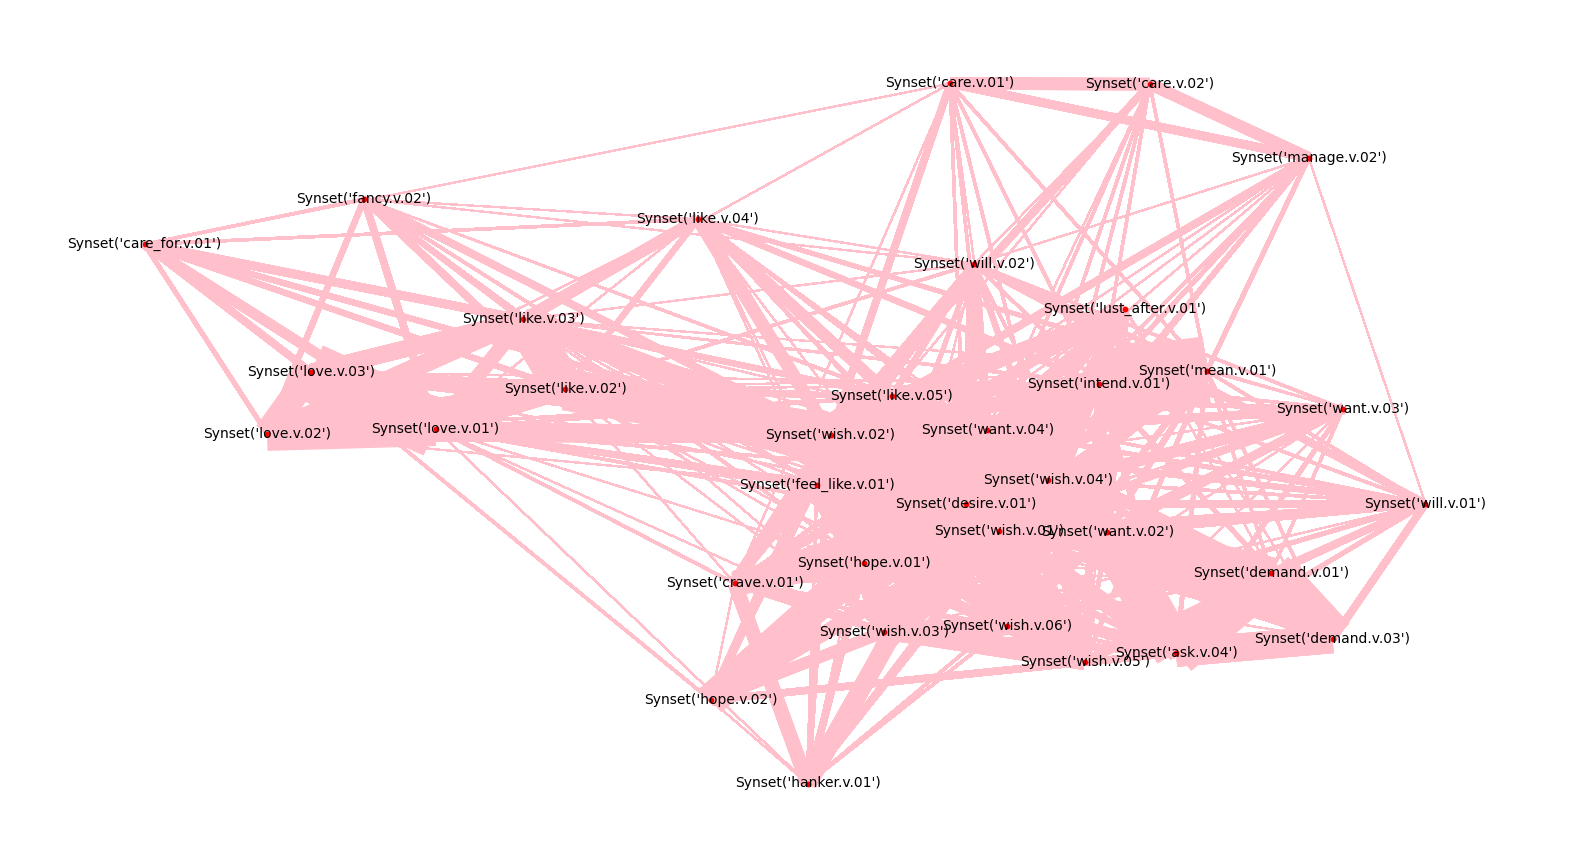

In [102]:
pos = nx.spring_layout(G, k = 0.1, iterations=100)
plt.figure(figsize=(20, 11))
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10)
weights = []
for (u, v, d) in G.edges(data=True):
    we = int(d['weight'])
    weights.append(we)
for w in weights:
    el = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == w]
    nx.draw_networkx_edges(G, pos, edgelist=el, edge_color='pink', width=w)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis('off')
plt.show()

### Шаг 4

Получилась большая связная компонента с большим весом рёбер, что ясно, потому что мы для большей плотности выбирали узлы с высокой степенью вершины; при этом видно, что некоторые синсеты кластеризуются немного в стороне, из-за чего плотность будет не очень высокой:


In [105]:
c = 0
d = 0
for i in range(len(trueclosesynsets)):
    for j in range(i+1, len(trueclosesynsets)):
        c += 1
        if (trueclosesynsets[i], trueclosesynsets[j]) in wsynedges.keys() or (trueclosesynsets[j], trueclosesynsets[i]) in wsynedges.keys():
            d += 1
print(f'Плотность: {d/c*100}%')

Плотность: 63.02521008403361%


In [108]:
G.degree(weight='weight')

DegreeView({Synset('intend.v.01'): 166, Synset('desire.v.01'): 459, Synset('fancy.v.02'): 33, Synset('wish.v.04'): 269, Synset('hope.v.01'): 276, Synset('will.v.01'): 55, Synset('demand.v.03'): 112, Synset('manage.v.02'): 36, Synset('love.v.03'): 99, Synset('love.v.02'): 94, Synset('mean.v.01'): 127, Synset('wish.v.01'): 381, Synset('lust_after.v.01'): 66, Synset('wish.v.02'): 451, Synset('like.v.05'): 211, Synset('like.v.03'): 116, Synset('feel_like.v.01'): 183, Synset('hope.v.02'): 73, Synset('wish.v.06'): 127, Synset('care.v.02'): 36, Synset('want.v.02'): 274, Synset('ask.v.04'): 156, Synset('want.v.03'): 51, Synset('care_for.v.01'): 34, Synset('want.v.04'): 259, Synset('wish.v.05'): 122, Synset('love.v.01'): 138, Synset('wish.v.03'): 173, Synset('crave.v.01'): 106, Synset('demand.v.01'): 155, Synset('care.v.01'): 36, Synset('like.v.04'): 51, Synset('will.v.02'): 64, Synset('like.v.02'): 131, Synset('hanker.v.01'): 52})

Видим, что вес рёбер может значительно отличаться, это должно повлиять и на степень центральности:

In [109]:
nx.degree_centrality(G)

{Synset('intend.v.01'): 0.8529411764705882,
 Synset('desire.v.01'): 0.9411764705882353,
 Synset('fancy.v.02'): 0.38235294117647056,
 Synset('wish.v.04'): 0.8823529411764706,
 Synset('hope.v.01'): 0.7941176470588235,
 Synset('will.v.01'): 0.5,
 Synset('demand.v.03'): 0.5,
 Synset('manage.v.02'): 0.38235294117647056,
 Synset('love.v.03'): 0.3529411764705882,
 Synset('love.v.02'): 0.29411764705882354,
 Synset('mean.v.01'): 0.7647058823529411,
 Synset('wish.v.01'): 0.8823529411764706,
 Synset('lust_after.v.01'): 0.4117647058823529,
 Synset('wish.v.02'): 1.0,
 Synset('like.v.05'): 0.8235294117647058,
 Synset('like.v.03'): 0.7058823529411764,
 Synset('feel_like.v.01'): 0.8823529411764706,
 Synset('hope.v.02'): 0.4411764705882353,
 Synset('wish.v.06'): 0.6764705882352942,
 Synset('care.v.02'): 0.3529411764705882,
 Synset('want.v.02'): 0.8235294117647058,
 Synset('ask.v.04'): 0.5588235294117647,
 Synset('want.v.03'): 0.5882352941176471,
 Synset('care_for.v.01'): 0.2647058823529412,
 Synset('wa

Видим, что наибольшая центральность, 1 - у "желать", 'wish.v.02', и близкая у других глаголов поля желания: 'desire.v.01', 'want.v.04'. Видимо, дезидеративность, оптативность, желательность - это то, что часто колексифицируется с глаголами позитивного отношения и любви.
С eigenvector centrality получаем похожее.

In [111]:
nx.eigenvector_centrality(G)

{Synset('intend.v.01'): 0.21169256924033653,
 Synset('desire.v.01'): 0.22643869481354426,
 Synset('fancy.v.02'): 0.09599131348770137,
 Synset('wish.v.04'): 0.21896635724377986,
 Synset('hope.v.01'): 0.20451182142512012,
 Synset('will.v.01'): 0.13779520080249813,
 Synset('demand.v.03'): 0.14005610504448537,
 Synset('manage.v.02'): 0.10474119988443266,
 Synset('love.v.03'): 0.0870572128004976,
 Synset('love.v.02'): 0.0652528801836963,
 Synset('mean.v.01'): 0.19824301799711966,
 Synset('wish.v.01'): 0.21896635724377986,
 Synset('lust_after.v.01'): 0.1201950985695496,
 Synset('wish.v.02'): 0.23124906570462522,
 Synset('like.v.05'): 0.20508439191991315,
 Synset('like.v.03'): 0.17572093333709585,
 Synset('feel_like.v.01'): 0.21368878978633674,
 Synset('hope.v.02'): 0.12222339139412211,
 Synset('wish.v.06'): 0.18406277333411472,
 Synset('care.v.02'): 0.0991162865985566,
 Synset('want.v.02'): 0.20977201828841363,
 Synset('ask.v.04'): 0.1538584708432225,
 Synset('want.v.03'): 0.1665021170330792

In [131]:
comgen = nx.algorithms.community.girvan_newman(G)
first = next(comgen)
second = next(comgen)
third = next(comgen)
print("Первый уровень:", first)
print("Уровень пониже:", second)
print("Совсем низкий уровень жестб:", third)

Первый уровень: ({Synset('intend.v.01'), Synset('desire.v.01'), Synset('fancy.v.02'), Synset('wish.v.04'), Synset('hope.v.01'), Synset('will.v.01'), Synset('demand.v.03'), Synset('manage.v.02'), Synset('love.v.03'), Synset('mean.v.01'), Synset('wish.v.01'), Synset('lust_after.v.01'), Synset('wish.v.02'), Synset('like.v.05'), Synset('like.v.03'), Synset('feel_like.v.01'), Synset('hope.v.02'), Synset('wish.v.06'), Synset('care.v.02'), Synset('want.v.02'), Synset('ask.v.04'), Synset('want.v.03'), Synset('care_for.v.01'), Synset('want.v.04'), Synset('wish.v.05'), Synset('love.v.01'), Synset('wish.v.03'), Synset('crave.v.01'), Synset('demand.v.01'), Synset('care.v.01'), Synset('like.v.04'), Synset('will.v.02'), Synset('like.v.02'), Synset('hanker.v.01')}, {Synset('love.v.02')})
Уровень пониже: ({Synset('intend.v.01'), Synset('desire.v.01'), Synset('fancy.v.02'), Synset('wish.v.04'), Synset('hope.v.01'), Synset('will.v.01'), Synset('demand.v.03'), Synset('manage.v.02'), Synset('love.v.03'), 

По Girvan-Newman мы видим по одному отделяющиеся сообщества с наиболее дальним синсетом. Любовь отделилась первой, позже отделилась забота. Это долго и непоказательно. Попробуем другой алгоритм:

In [132]:
nx.algorithms.community.greedy_modularity_communities(G)

[frozenset({Synset('ask.v.04'),
            Synset('care.v.01'),
            Synset('care.v.02'),
            Synset('crave.v.01'),
            Synset('demand.v.01'),
            Synset('demand.v.03'),
            Synset('desire.v.01'),
            Synset('feel_like.v.01'),
            Synset('hope.v.02'),
            Synset('intend.v.01'),
            Synset('lust_after.v.01'),
            Synset('manage.v.02'),
            Synset('mean.v.01'),
            Synset('want.v.04'),
            Synset('will.v.01'),
            Synset('wish.v.01'),
            Synset('wish.v.04'),
            Synset('wish.v.05')}),
 frozenset({Synset('care_for.v.01'),
            Synset('fancy.v.02'),
            Synset('like.v.02'),
            Synset('like.v.03'),
            Synset('like.v.04'),
            Synset('like.v.05'),
            Synset('love.v.01'),
            Synset('love.v.02'),
            Synset('love.v.03'),
            Synset('will.v.02'),
            Synset('wish.v.02')}),
 frozenset({S

Синсеты разделились на три группы: первая - общий по всему полю, вторая - глаголы как раз-таки любви, заботы и позитивного отношения к чему-либо, третья - глаголы желания и надежды. Они соответствуют кластерам! Этот алгоритм разбиения на сообщества выглядит более приятным

### Шаг 5

In [112]:
trueclosesynsets2 = set()
for x in closesynsets:
    if closesynsets.count(x) > 5:
        trueclosesynsets2.add(x)
trueclosesynsets2 = list(trueclosesynsets2)
print(trueclosesynsets2)
print(len(trueclosesynsets2))

[Synset('intend.v.01'), Synset('desire.v.01'), Synset('wish.v.04'), Synset('hope.v.01'), Synset('manage.v.02'), Synset('love.v.02'), Synset('mean.v.01'), Synset('wish.v.01'), Synset('lust_after.v.01'), Synset('wish.v.02'), Synset('like.v.05'), Synset('like.v.03'), Synset('feel_like.v.01'), Synset('hope.v.02'), Synset('wish.v.06'), Synset('care.v.02'), Synset('want.v.02'), Synset('want.v.04'), Synset('wish.v.05'), Synset('love.v.01'), Synset('wish.v.03'), Synset('crave.v.01'), Synset('demand.v.01'), Synset('care.v.01'), Synset('like.v.04'), Synset('like.v.02')]
26


In [124]:
lems2 = {}
for x in trueclosesynsets2:
    for l in wn.langs():
      if x in lems2:
        if type(x.lemmas(l)) is list:
            for i in x.lemmas(l):
                lems2[x].append(i)
        else:
            lems2[x].append(x.lemmas(l))
      else:
          if type(x.lemmas(l)) is list:
              for i in x.lemmas(l):
                  lems2[x] = [i]
          else:
              lems2[x] = [x.lemmas(l)]

In [114]:
synedges2 = list(combinations(lems2,2))

In [125]:
wsynedges2 = {}
for e in synedges2:
    syn1, syn2 = e
    for ls in lems2[syn1]:
        if ls in lems2[syn2]:
          if e in wsynedges2:
            wsynedges2[e] += 1
          else:
            wsynedges2[e] = 1

In [116]:
G2 = nx.Graph()
for v in trueclosesynsets2:
    G2.add_node(v)
for node in wsynedges2.keys():
    a, b = node
    G2.add_edge(a, b, weight = int(wsynedges2[node]))

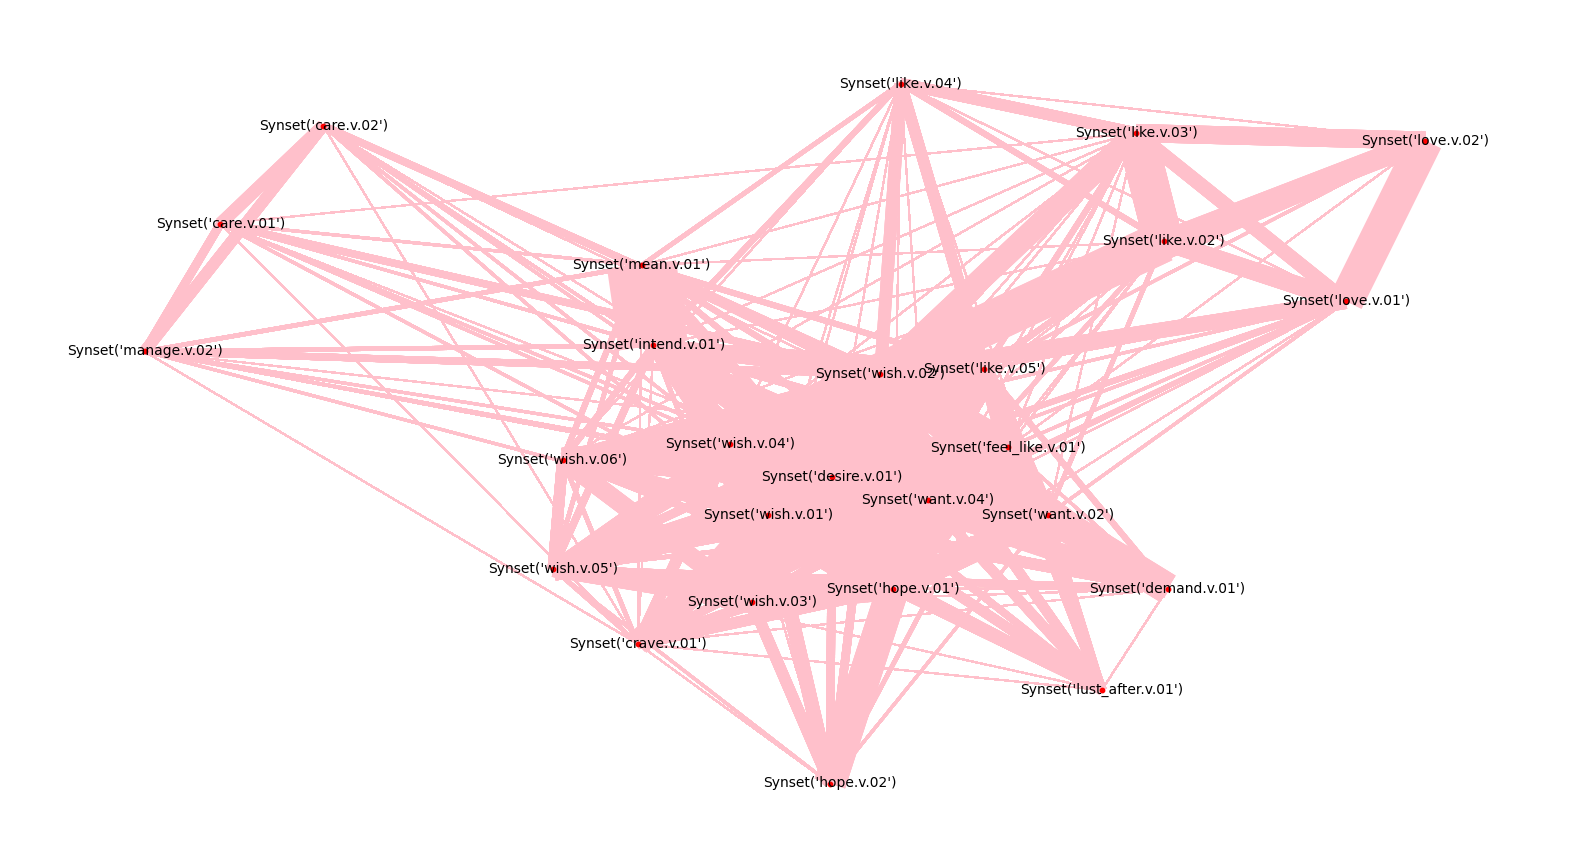

In [118]:
pos2 = nx.spring_layout(G2, k = 0.1, iterations=100)
plt.figure(figsize=(20, 11))
nx.draw_networkx_nodes(G2, pos2, node_color='red', node_size=10)
weights2 = []
for (u, v, d) in G2.edges(data=True):
    we = int(d['weight'])
    weights2.append(we)
for w in weights2:
    el = [(u, v) for (u, v, d) in G2.edges(data=True) if d["weight"] == w]
    nx.draw_networkx_edges(G2, pos2, edgelist=el, edge_color='pink', width=w)
nx.draw_networkx_labels(G2, pos2, font_size=10)
plt.axis('off')
plt.show()

Уменьшилось количество точек, что ожидаемо, и увеличился разрыв между кластерами вершин. За счёт первого плотность графа возросла:

In [119]:
c2 = 0
d2 = 0
for i in range(len(trueclosesynsets2)):
    for j in range(i+1, len(trueclosesynsets2)):
        c2 += 1
        if (trueclosesynsets2[i], trueclosesynsets2[j]) in wsynedges2.keys() or (trueclosesynsets2[j], trueclosesynsets2[i]) in wsynedges2.keys():
            d2 += 1
print(f'Плотность: {d2/c2*100}%')

Плотность: 73.53846153846155%


In [121]:
G2.degree(weight='weight')

DegreeView({Synset('intend.v.01'): 153, Synset('desire.v.01'): 403, Synset('wish.v.04'): 253, Synset('hope.v.01'): 257, Synset('manage.v.02'): 34, Synset('love.v.02'): 68, Synset('mean.v.01'): 116, Synset('wish.v.01'): 352, Synset('lust_after.v.01'): 65, Synset('wish.v.02'): 410, Synset('like.v.05'): 195, Synset('like.v.03'): 91, Synset('feel_like.v.01'): 171, Synset('hope.v.02'): 65, Synset('wish.v.06'): 118, Synset('care.v.02'): 35, Synset('want.v.02'): 212, Synset('want.v.04'): 235, Synset('wish.v.05'): 110, Synset('love.v.01'): 81, Synset('wish.v.03'): 162, Synset('crave.v.01'): 93, Synset('demand.v.01'): 81, Synset('care.v.01'): 34, Synset('like.v.04'): 46, Synset('like.v.02'): 112})

In [122]:
nx.degree_centrality(G2)

{Synset('intend.v.01'): 0.92,
 Synset('desire.v.01'): 0.96,
 Synset('wish.v.04'): 0.96,
 Synset('hope.v.01'): 0.84,
 Synset('manage.v.02'): 0.44,
 Synset('love.v.02'): 0.28,
 Synset('mean.v.01'): 0.84,
 Synset('wish.v.01'): 0.96,
 Synset('lust_after.v.01'): 0.52,
 Synset('wish.v.02'): 1.0,
 Synset('like.v.05'): 0.84,
 Synset('like.v.03'): 0.72,
 Synset('feel_like.v.01'): 0.96,
 Synset('hope.v.02'): 0.48,
 Synset('wish.v.06'): 0.72,
 Synset('care.v.02'): 0.44,
 Synset('want.v.02'): 0.84,
 Synset('want.v.04'): 0.96,
 Synset('wish.v.05'): 0.68,
 Synset('love.v.01'): 0.6,
 Synset('wish.v.03'): 0.8,
 Synset('crave.v.01'): 0.88,
 Synset('demand.v.01'): 0.64,
 Synset('care.v.01'): 0.48,
 Synset('like.v.04'): 0.64,
 Synset('like.v.02'): 0.72}

In [123]:
nx.eigenvector_centrality(G2)

{Synset('intend.v.01'): 0.23009716693570392,
 Synset('desire.v.01'): 0.23790269450740462,
 Synset('wish.v.04'): 0.23790269450740462,
 Synset('hope.v.01'): 0.21997777491771112,
 Synset('manage.v.02'): 0.11975909152471344,
 Synset('love.v.02'): 0.07162641850442891,
 Synset('mean.v.01'): 0.21612977204537684,
 Synset('wish.v.01'): 0.23790269450740462,
 Synset('lust_after.v.01'): 0.14820020472051978,
 Synset('wish.v.02'): 0.24138784164244415,
 Synset('like.v.05'): 0.21670649976413034,
 Synset('like.v.03'): 0.18731565720976437,
 Synset('feel_like.v.01'): 0.23313065878174144,
 Synset('hope.v.02'): 0.13885831452383246,
 Synset('wish.v.06'): 0.19820485245568328,
 Synset('care.v.02'): 0.11975909152471344,
 Synset('want.v.02'): 0.21997777491771112,
 Synset('want.v.04'): 0.23790269450740464,
 Synset('wish.v.05'): 0.18546958609424688,
 Synset('love.v.01'): 0.16041924082087372,
 Synset('wish.v.03'): 0.21276680231600417,
 Synset('crave.v.01'): 0.22053126689157312,
 Synset('demand.v.01'): 0.1787131638

Центральность дезидеративов увеличилась, а вот глаголы поля "нравиться" отошли немного на второй план. Интересно, что начинали мы с like, но колексификация решила распорядиться графом по-другому.


С прошлым разом мне больше понравился второй алгоритм, поэтому пересчитаем только его.

In [133]:
nx.algorithms.community.greedy_modularity_communities(G2)

[frozenset({Synset('care.v.01'),
            Synset('care.v.02'),
            Synset('crave.v.01'),
            Synset('demand.v.01'),
            Synset('desire.v.01'),
            Synset('feel_like.v.01'),
            Synset('hope.v.02'),
            Synset('intend.v.01'),
            Synset('lust_after.v.01'),
            Synset('manage.v.02'),
            Synset('mean.v.01'),
            Synset('want.v.04'),
            Synset('wish.v.01'),
            Synset('wish.v.04'),
            Synset('wish.v.05')}),
 frozenset({Synset('hope.v.01'),
            Synset('like.v.02'),
            Synset('like.v.03'),
            Synset('like.v.04'),
            Synset('like.v.05'),
            Synset('love.v.01'),
            Synset('love.v.02'),
            Synset('want.v.02'),
            Synset('wish.v.02'),
            Synset('wish.v.03'),
            Synset('wish.v.06')})]

В этот раз видим два кластера, и не до конца очевидно, как они разбились, но выглядит так, будто в первую группу попали скорее действия, а во вторую - неконтролируемые чувства-состояния.


Более показательным будет, мне кажется, второй граф: мы, конечно, теряем синсет 'fancy', и сообщества видны хуже, например, но зато более чётко визуально видим кластеры глаголов желания, любви в общем, заботы, надежды.

### Шаг 6
Семантика глаголов со значением "нравиться" близка глаголам пожелания: если нам что-то нравится, мы, вероятно, желаем побольше этого в жизни

Отсюда же выходят глаголы с "просить" - действие, направленное на получение желаемого

Также глаголы со значением "нравиться" часто колексифицируются с глаголами значения "любить", что тоже логично: они означают похожие позитивные чувства, отличаясь интенсивностью

Отсюда выходят глаголы со значением заботы и управления чем-то: если нам что-то нравится, мы заботимся о благополучии этого чего-то. А заботиться можно как о человеке, так и о каком-то проекте.

Ещё есть колексификация со значением "чувствовать себя, как". Видимо, вещам, которые нам нравятся, мы часто эмпатизируем.

### Шаг 7

CLICS также имеет на графе концепты GET, BUY, THINK. В остальном графы получаются очень похожими.